In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('cuasinoides.xlsx', sheet_name='pkcsm')

In [3]:
distribution_cols = [
    "[Distribution/Blood-Brain Barrier] Probability",
    "[Distribution/Fraction Unbound (Human)] Predictions",
    "[Distribution/Plasma Protein Binding] Predictions",
    "[Distribution/Steady State Volume of Distribution] Predictions"
]

distribution = df[distribution_cols].copy()


In [4]:
#Limpiar nombres de las columnas 
distribution.columns = (
    distribution.columns
        .str.replace(r"\[Distribution/", "", regex=True)
        .str.replace("]", "", regex=False)
        .str.lower()
        .str.replace(" ", "_")
        .str.replace("-", "_")
)


In [5]:
distribution

,blood_brain_barrier_probability,fraction_unbound_(human)_predictions,plasma_protein_binding_predictions,steady_state_volume_of_distribution_predictions
0,0.269,1.10,95.24,1.62
1,0.613,0.56,68.81,0.93
2,0.998,0.74,70.19,0.78
3,0.981,0.58,68.64,1.01
4,0.043,0.62,80.92,1.11
5,0.003,0.73,76.31,0.37
6,0.000,0.68,74.33,0.37
7,0.009,0.71,75.06,0.36
8,1.000,0.59,66.85,0.90
9,0.279,0.63,61.82,0.84


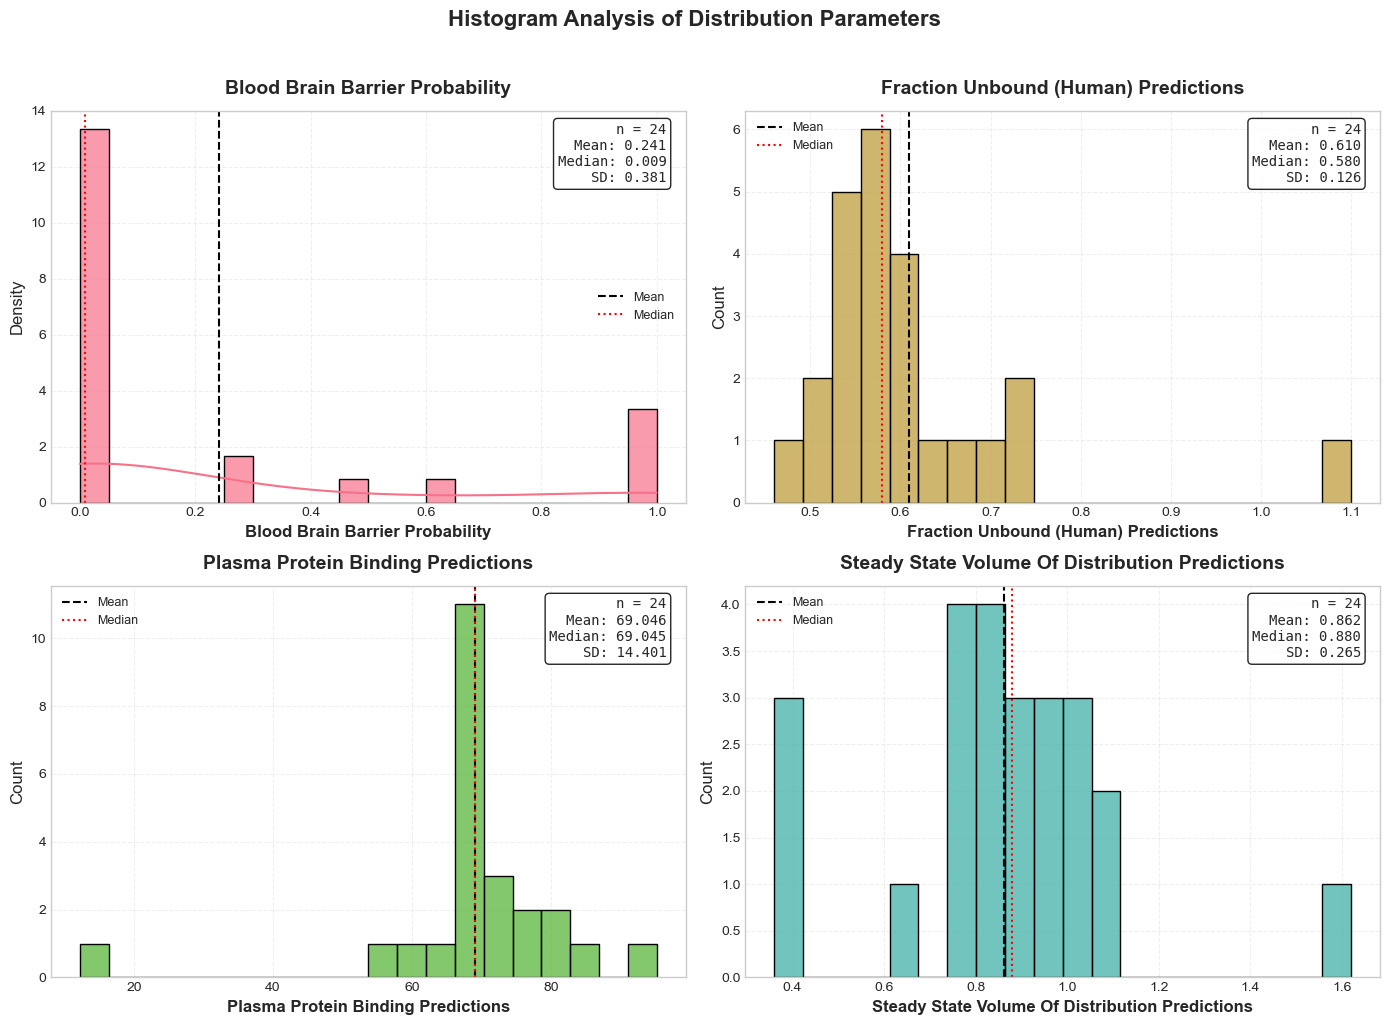

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================
# Output directory
# ==============================
OUTPUT_DIR = "2.Distribucion"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# ==============================
# Plotting style (UNCHANGED)
# ==============================
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("husl")

# ==============================
# Variable types (Distribution – snake_case)
# ==============================
variable_types = {
    "blood_brain_barrier_probability": "probability",
    "fraction_unbound_(human)_predictions": "value",
    "plasma_protein_binding_predictions": "value",
    "steady_state_volume_of_distribution_predictions": "value"
}

# ==============================
# Histogram plotting function
# ==============================
def create_histogram(ax, data, title, xlabel, color, var_type):
    data = data.dropna()

    use_density = var_type == "probability"

    sns.histplot(
        data,
        bins=20 if var_type != "binary" else 2,
        kde=use_density,
        stat="density" if use_density else "count",
        ax=ax,
        color=color,
        edgecolor="black",
        alpha=0.7
    )

    ax.set_title(title, fontsize=14, fontweight="bold", pad=12)
    ax.set_xlabel(xlabel, fontsize=12, fontweight="bold")
    ax.set_ylabel("Density" if use_density else "Count", fontsize=12)
    ax.grid(True, alpha=0.3, linestyle="--")
    ax.set_axisbelow(True)

    mean = data.mean()
    median = data.median()
    std = data.std()

    ax.axvline(mean, color="black", linestyle="--", linewidth=1.5, label="Mean")
    ax.axvline(median, color="red", linestyle=":", linewidth=1.5, label="Median")
    ax.legend(fontsize=9)

    text_str = (
        f"n = {len(data)}\n"
        f"Mean: {mean:.3f}\n"
        f"Median: {median:.3f}\n"
        f"SD: {std:.3f}"
    )

    ax.text(
        0.97, 0.97,
        text_str,
        transform=ax.transAxes,
        fontsize=10,
        verticalalignment="top",
        horizontalalignment="right",
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.85),
        fontfamily="monospace"
    )

# ==============================
# Create Distribution histograms
# ==============================
cols = list(distribution.columns)
ncols = 2
nrows = int(np.ceil(len(cols) / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(14, 5 * nrows))
axes = axes.flatten()

palette = sns.color_palette()

for i, col in enumerate(cols):
    create_histogram(
        ax=axes[i],
        data=distribution[col],
        title=col.replace("_", " ").title(),
        xlabel=col.replace("_", " ").title(),
        color=palette[i % len(palette)],
        var_type=variable_types[col]
    )

# Remove unused axes
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

# ==============================
# Global title & save
# ==============================
plt.suptitle(
    "Histogram Analysis of Distribution Parameters",
    fontsize=16,
    fontweight="bold",
    y=1.02
)

plt.tight_layout()
plt.savefig(
    os.path.join(OUTPUT_DIR, "distribution_histograms.png"),
    dpi=350,
    bbox_inches="tight"
)
plt.show()


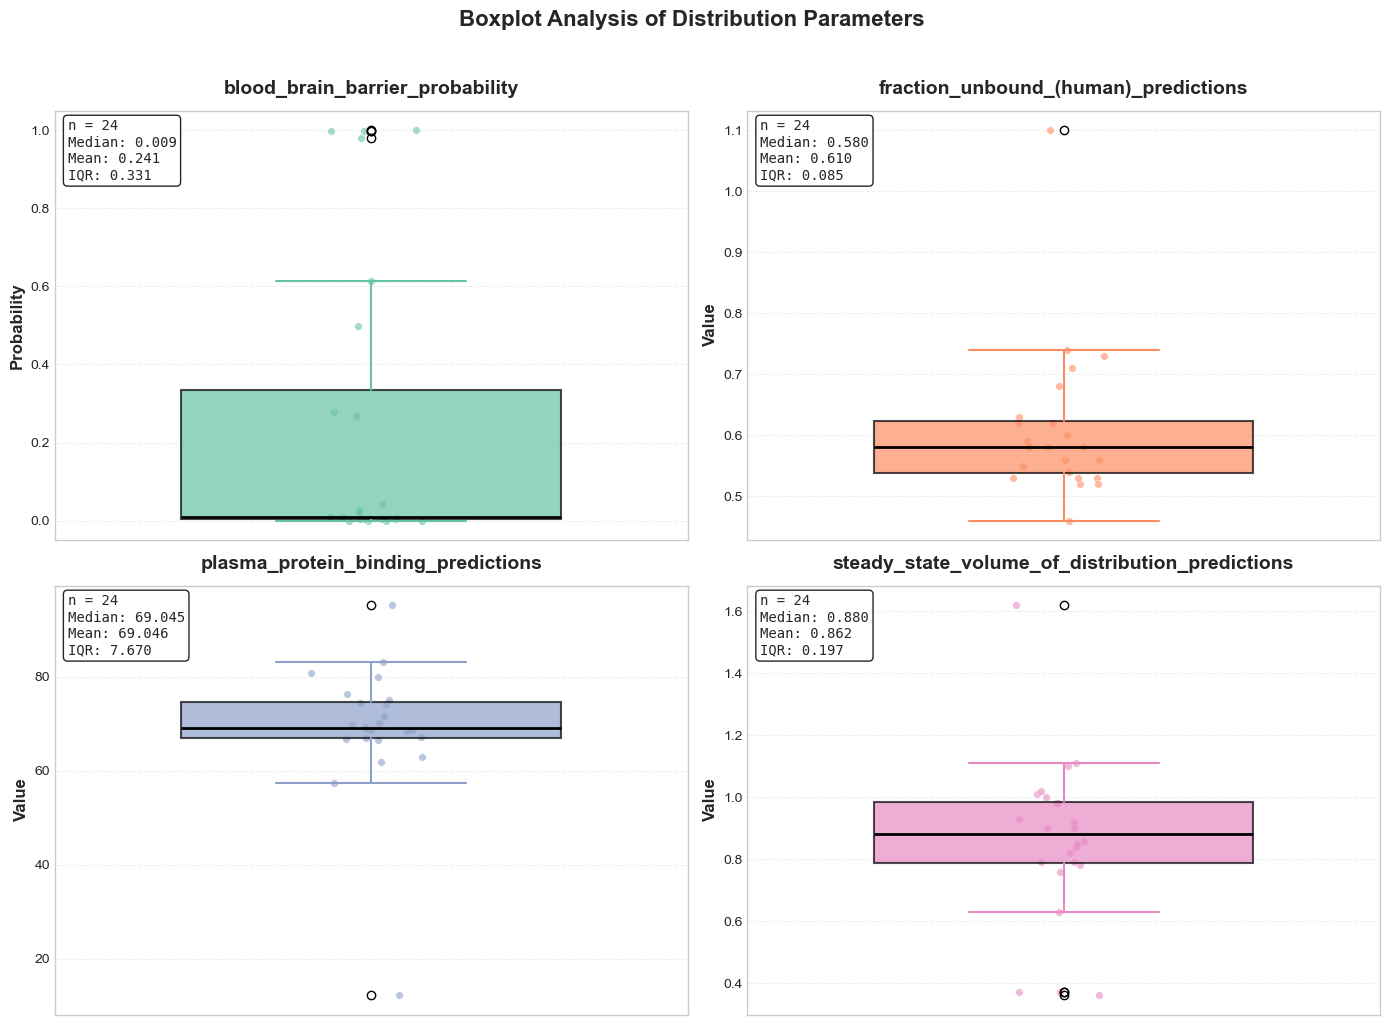

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================
# Output directory
# ==============================
OUTPUT_DIR = "2.Distribucion"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# ==============================
# Variable types (Distribution)
# ==============================
variable_types = {
    "blood_brain_barrier_probability": "probability",
    "fraction_unbound_(human)_predictions": "value",
    "plasma_protein_binding_predictions": "value",
    "steady_state_volume_of_distribution_predictions": "value"
}


# ==============================
# Boxplot function
# ==============================
def create_boxplot(ax, data, title, ylabel, color, var_type):
    data = data.dropna()

    boxprops = dict(facecolor=color, alpha=0.7, linewidth=1.5)
    whiskerprops = dict(color=color, linewidth=1.5)
    capprops = dict(color=color, linewidth=1.5)
    medianprops = dict(color="black", linewidth=2)

    ax.boxplot(
        data,
        patch_artist=True,
        boxprops=boxprops,
        whiskerprops=whiskerprops,
        capprops=capprops,
        medianprops=medianprops,
        widths=0.6
    )

    x = np.random.normal(1, 0.04, size=len(data))
    ax.scatter(
        x,
        data,
        alpha=0.6,
        s=30,
        color=color,
        edgecolors="white",
        linewidth=0.5
    )

    ax.set_title(title, fontsize=14, fontweight="bold", pad=12)
    ax.set_ylabel(ylabel, fontsize=12, fontweight="bold")
    ax.set_xticks([])
    ax.grid(True, alpha=0.3, linestyle="--")
    ax.set_axisbelow(True)

    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)

    text_str = (
        f"n = {len(data)}\n"
        f"Median: {data.median():.3f}\n"
        f"Mean: {data.mean():.3f}\n"
        f"IQR: {(q3 - q1):.3f}"
    )

    ax.text(
        0.02, 0.98,
        text_str,
        transform=ax.transAxes,
        fontsize=10,
        verticalalignment="top",
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.85),
        fontfamily="monospace"
    )

# ==============================
# Create Distribution boxplots
# ==============================
cols = list(distribution.columns)
ncols = 2
nrows = int(np.ceil(len(cols) / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(14, 5 * nrows))
axes = axes.flatten()

palette = sns.color_palette("Set2")

for i, col in enumerate(cols):
    ylabel = "Probability" if variable_types[col] == "probability" else "Value"

    create_boxplot(
        ax=axes[i],
        data=distribution[col],
        title=col,
        ylabel=ylabel,
        color=palette[i % len(palette)],
        var_type=variable_types[col]
    )

# Remove unused axes
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

# ==============================
# Global title & save
# ==============================
plt.suptitle(
    "Boxplot Analysis of Distribution Parameters ",
    fontsize=16,
    fontweight="bold",
    y=1.02
)

plt.tight_layout()
plt.savefig(
    os.path.join(OUTPUT_DIR, "distribution_boxplots.png"),
    dpi=350,
    bbox_inches="tight"
)
plt.show()



C:\Users\Usuario X\anaconda3\envs\fac\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


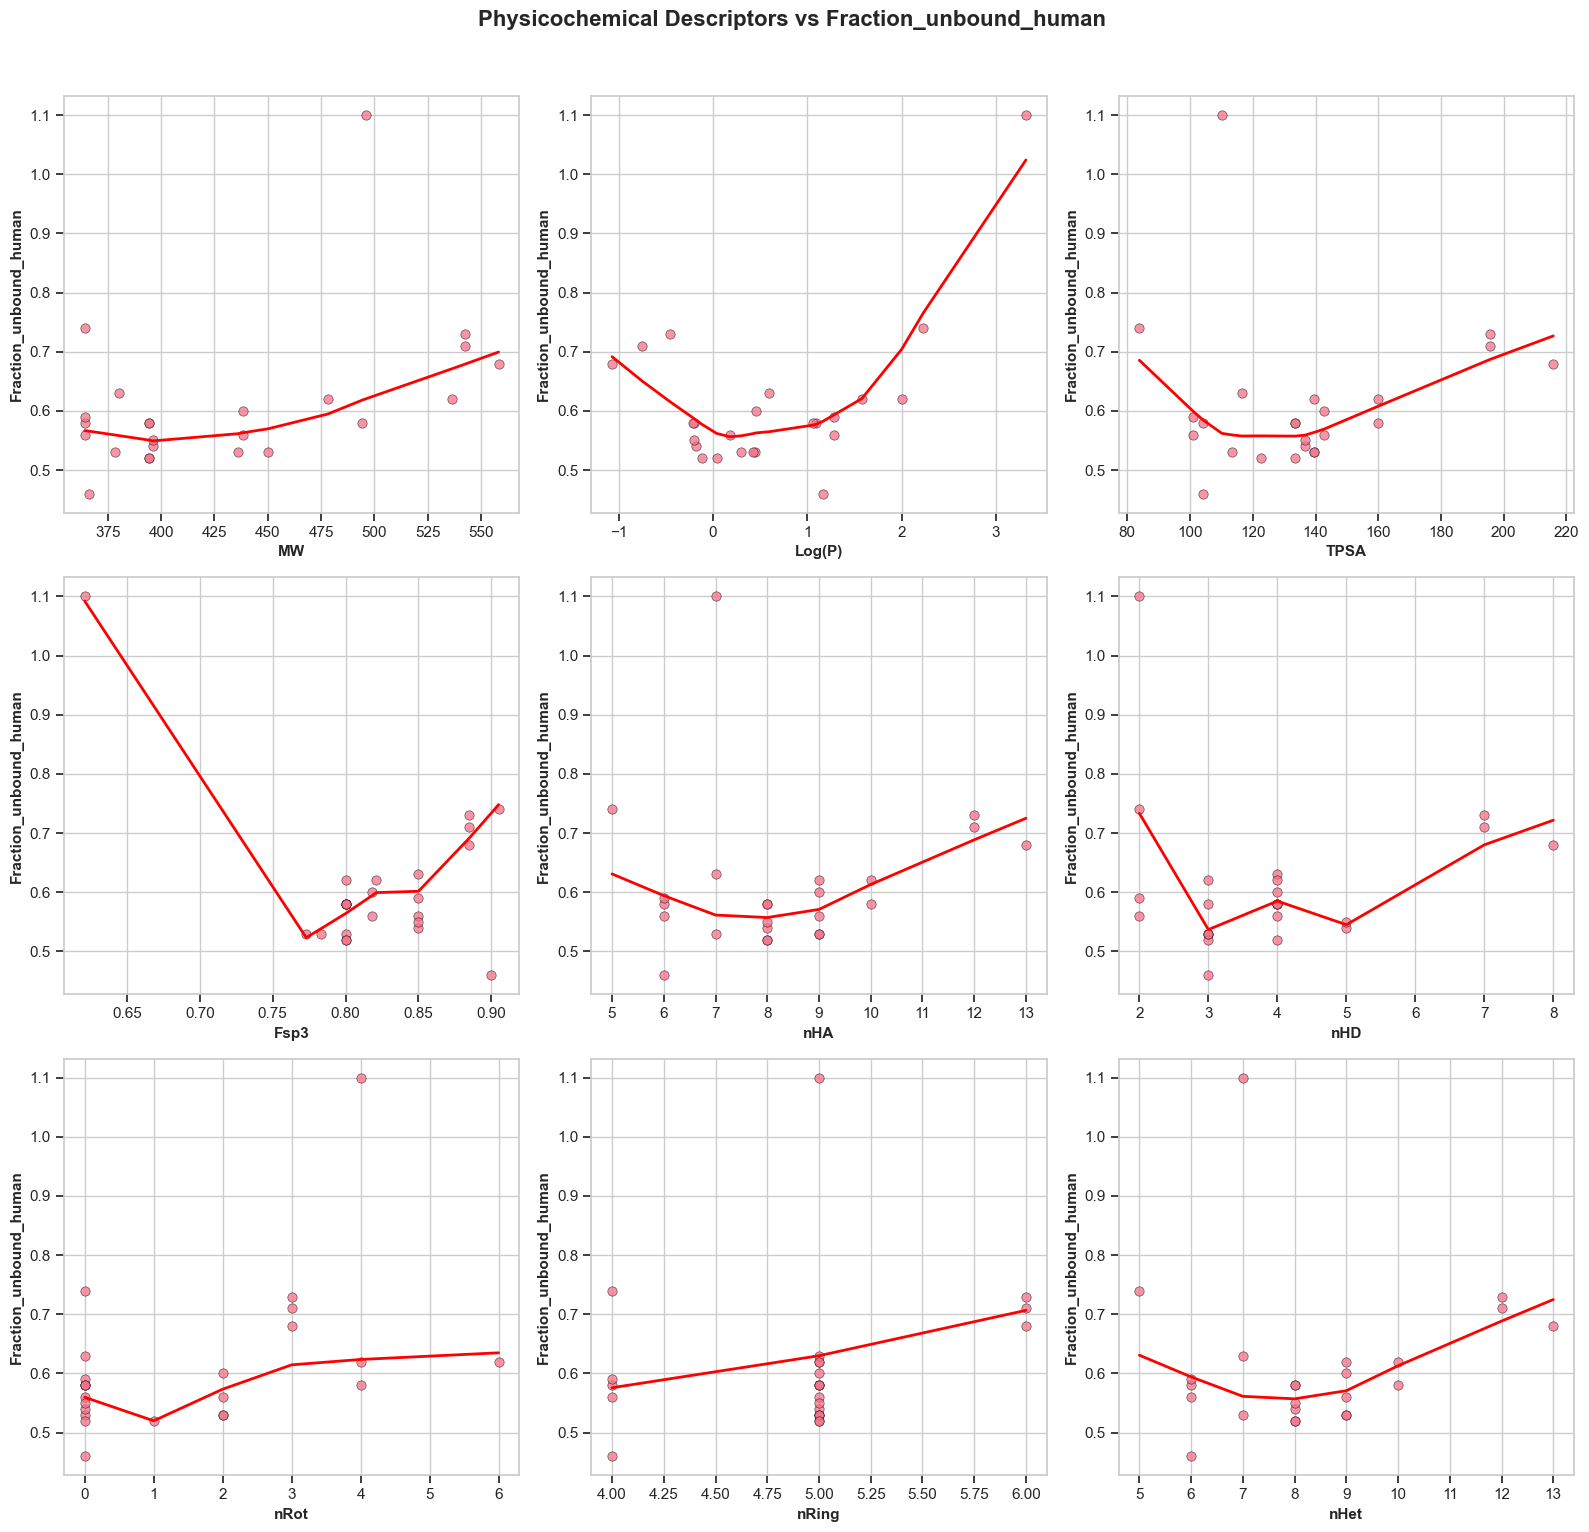

C:\Users\Usuario X\anaconda3\envs\fac\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


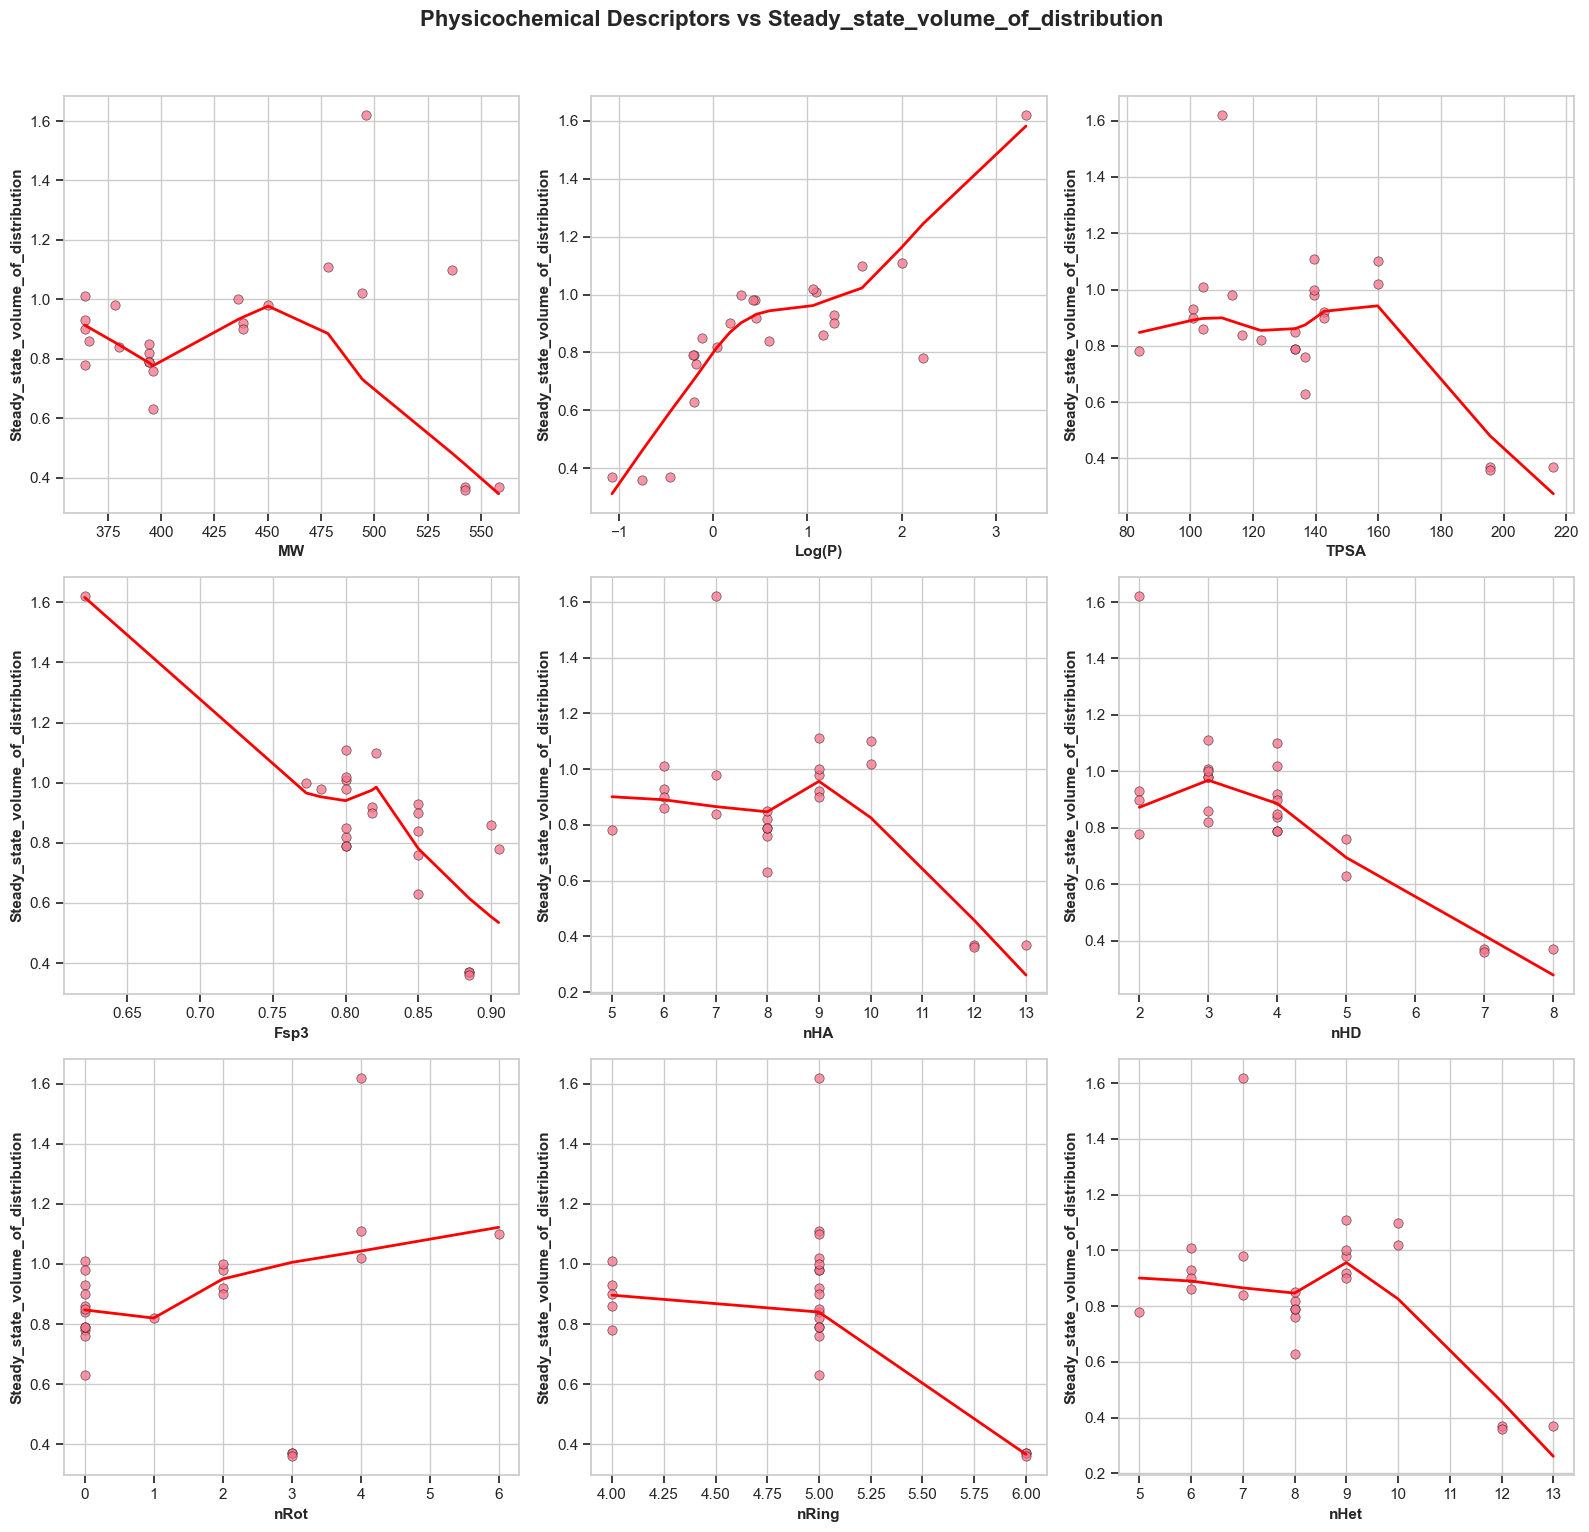

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# =========================================================
# Configuration
# =========================================================
INPUT_FILE = "cuasinoides.xlsx"
SHEET_NAME = "pkcsm"
OUTPUT_DIR = "2.Distribution"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# =========================================================
# Read data
# =========================================================
df = pd.read_excel(INPUT_FILE, sheet_name=SHEET_NAME)

# =========================================================
# Descriptor variables (RAW names)
# =========================================================
descriptor_cols = [
    "MW",
    "nHA",
    "nHD",
    "[General Properties/Log(P)] Predictions",
    "TPSA",
    "Fsp3",
    "nRing",
    "nHet",
    "nRot"
]

# =========================================================
# Distribution variables (RAW names)
# =========================================================
distribution_cols_raw = [
    "[Distribution/Fraction Unbound (Human)] Predictions",
    "[Distribution/Steady State Volume of Distribution] Predictions"
]

# =========================================================
# Subset dataframe
# =========================================================
df = df[descriptor_cols + distribution_cols_raw].copy()

# =========================================================
# Clean column names
# =========================================================
def clean_descriptor(col):
    col = col.replace("[General Properties/", "")
    col = col.replace("] Predictions", "")
    return col.strip()

def clean_distribution(col):
    if "Fraction Unbound" in col:
        return "Fraction_unbound_human"
    if "Steady State Volume of Distribution" in col:
        return "Steady_state_volume_of_distribution"
    return col

rename_map = {}
for c in df.columns:
    if c in descriptor_cols:
        rename_map[c] = clean_descriptor(c)
    if c in distribution_cols_raw:
        rename_map[c] = clean_distribution(c)

df = df.rename(columns=rename_map)

# =========================================================
# Final column groups
# =========================================================
descriptor_cols_clean = [
    "MW", "Log(P)", "TPSA", "Fsp3",
    "nHA", "nHD", "nRot", "nRing", "nHet"
]

distribution_cols_clean = [
    "Fraction_unbound_human",
    "Steady_state_volume_of_distribution"
]

# =========================================================
# Numeric coercion
# =========================================================
df = df.apply(pd.to_numeric, errors="coerce")

# Drop rows with no distribution data
df = df.dropna(subset=distribution_cols_clean, how="all")

# =========================================================
# Plot style
# =========================================================
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_context("notebook")

# =========================================================
# Bivariate plotting function
# =========================================================
def bivariate_plot(ax, x, y, x_label, y_label):
    sns.scatterplot(
        x=x,
        y=y,
        ax=ax,
        s=45,
        alpha=0.75,
        edgecolor="black",
        linewidth=0.4
    )

    # LOWESS trend (robust for small datasets)
    sns.regplot(
        x=x,
        y=y,
        ax=ax,
        scatter=False,
        lowess=True,
        color="red",
        line_kws={"linewidth": 2}
    )

    ax.set_xlabel(x_label, fontsize=11, fontweight="bold")
    ax.set_ylabel(y_label, fontsize=11, fontweight="bold")

# =========================================================
# Generate plots
# =========================================================
for pk_var in distribution_cols_clean:

    ncols = 3
    nrows = int(np.ceil(len(descriptor_cols_clean) / ncols))

    fig, axes = plt.subplots(
        nrows, ncols,
        figsize=(16, 5 * nrows)
    )
    axes = axes.flatten()

    for i, desc in enumerate(descriptor_cols_clean):
        bivariate_plot(
            ax=axes[i],
            x=df[desc],
            y=df[pk_var],
            x_label=desc,
            y_label=pk_var
        )

    # Remove unused subplots
    for j in range(len(descriptor_cols_clean), len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle(
        f"Physicochemical Descriptors vs {pk_var}",
        fontsize=16,
        fontweight="bold",
        y=1.02
    )

    plt.tight_layout()
    plt.savefig(
        os.path.join(
            OUTPUT_DIR,
            f"bivariate_{pk_var}.png"
        ),
        dpi=350,
        bbox_inches="tight"
    )
    plt.show()


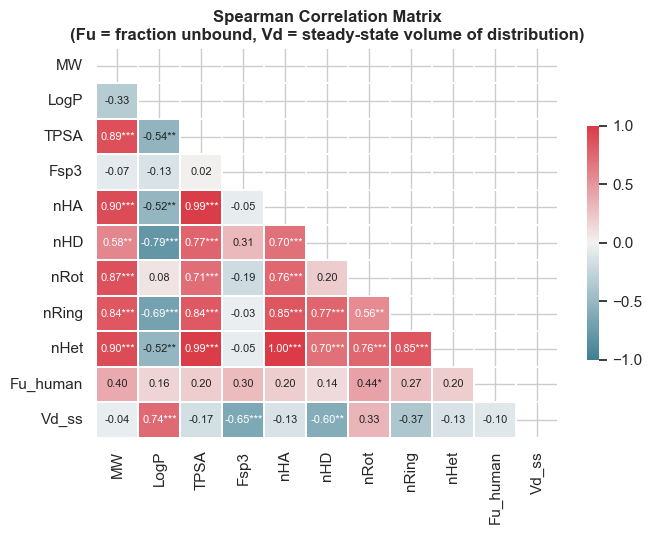

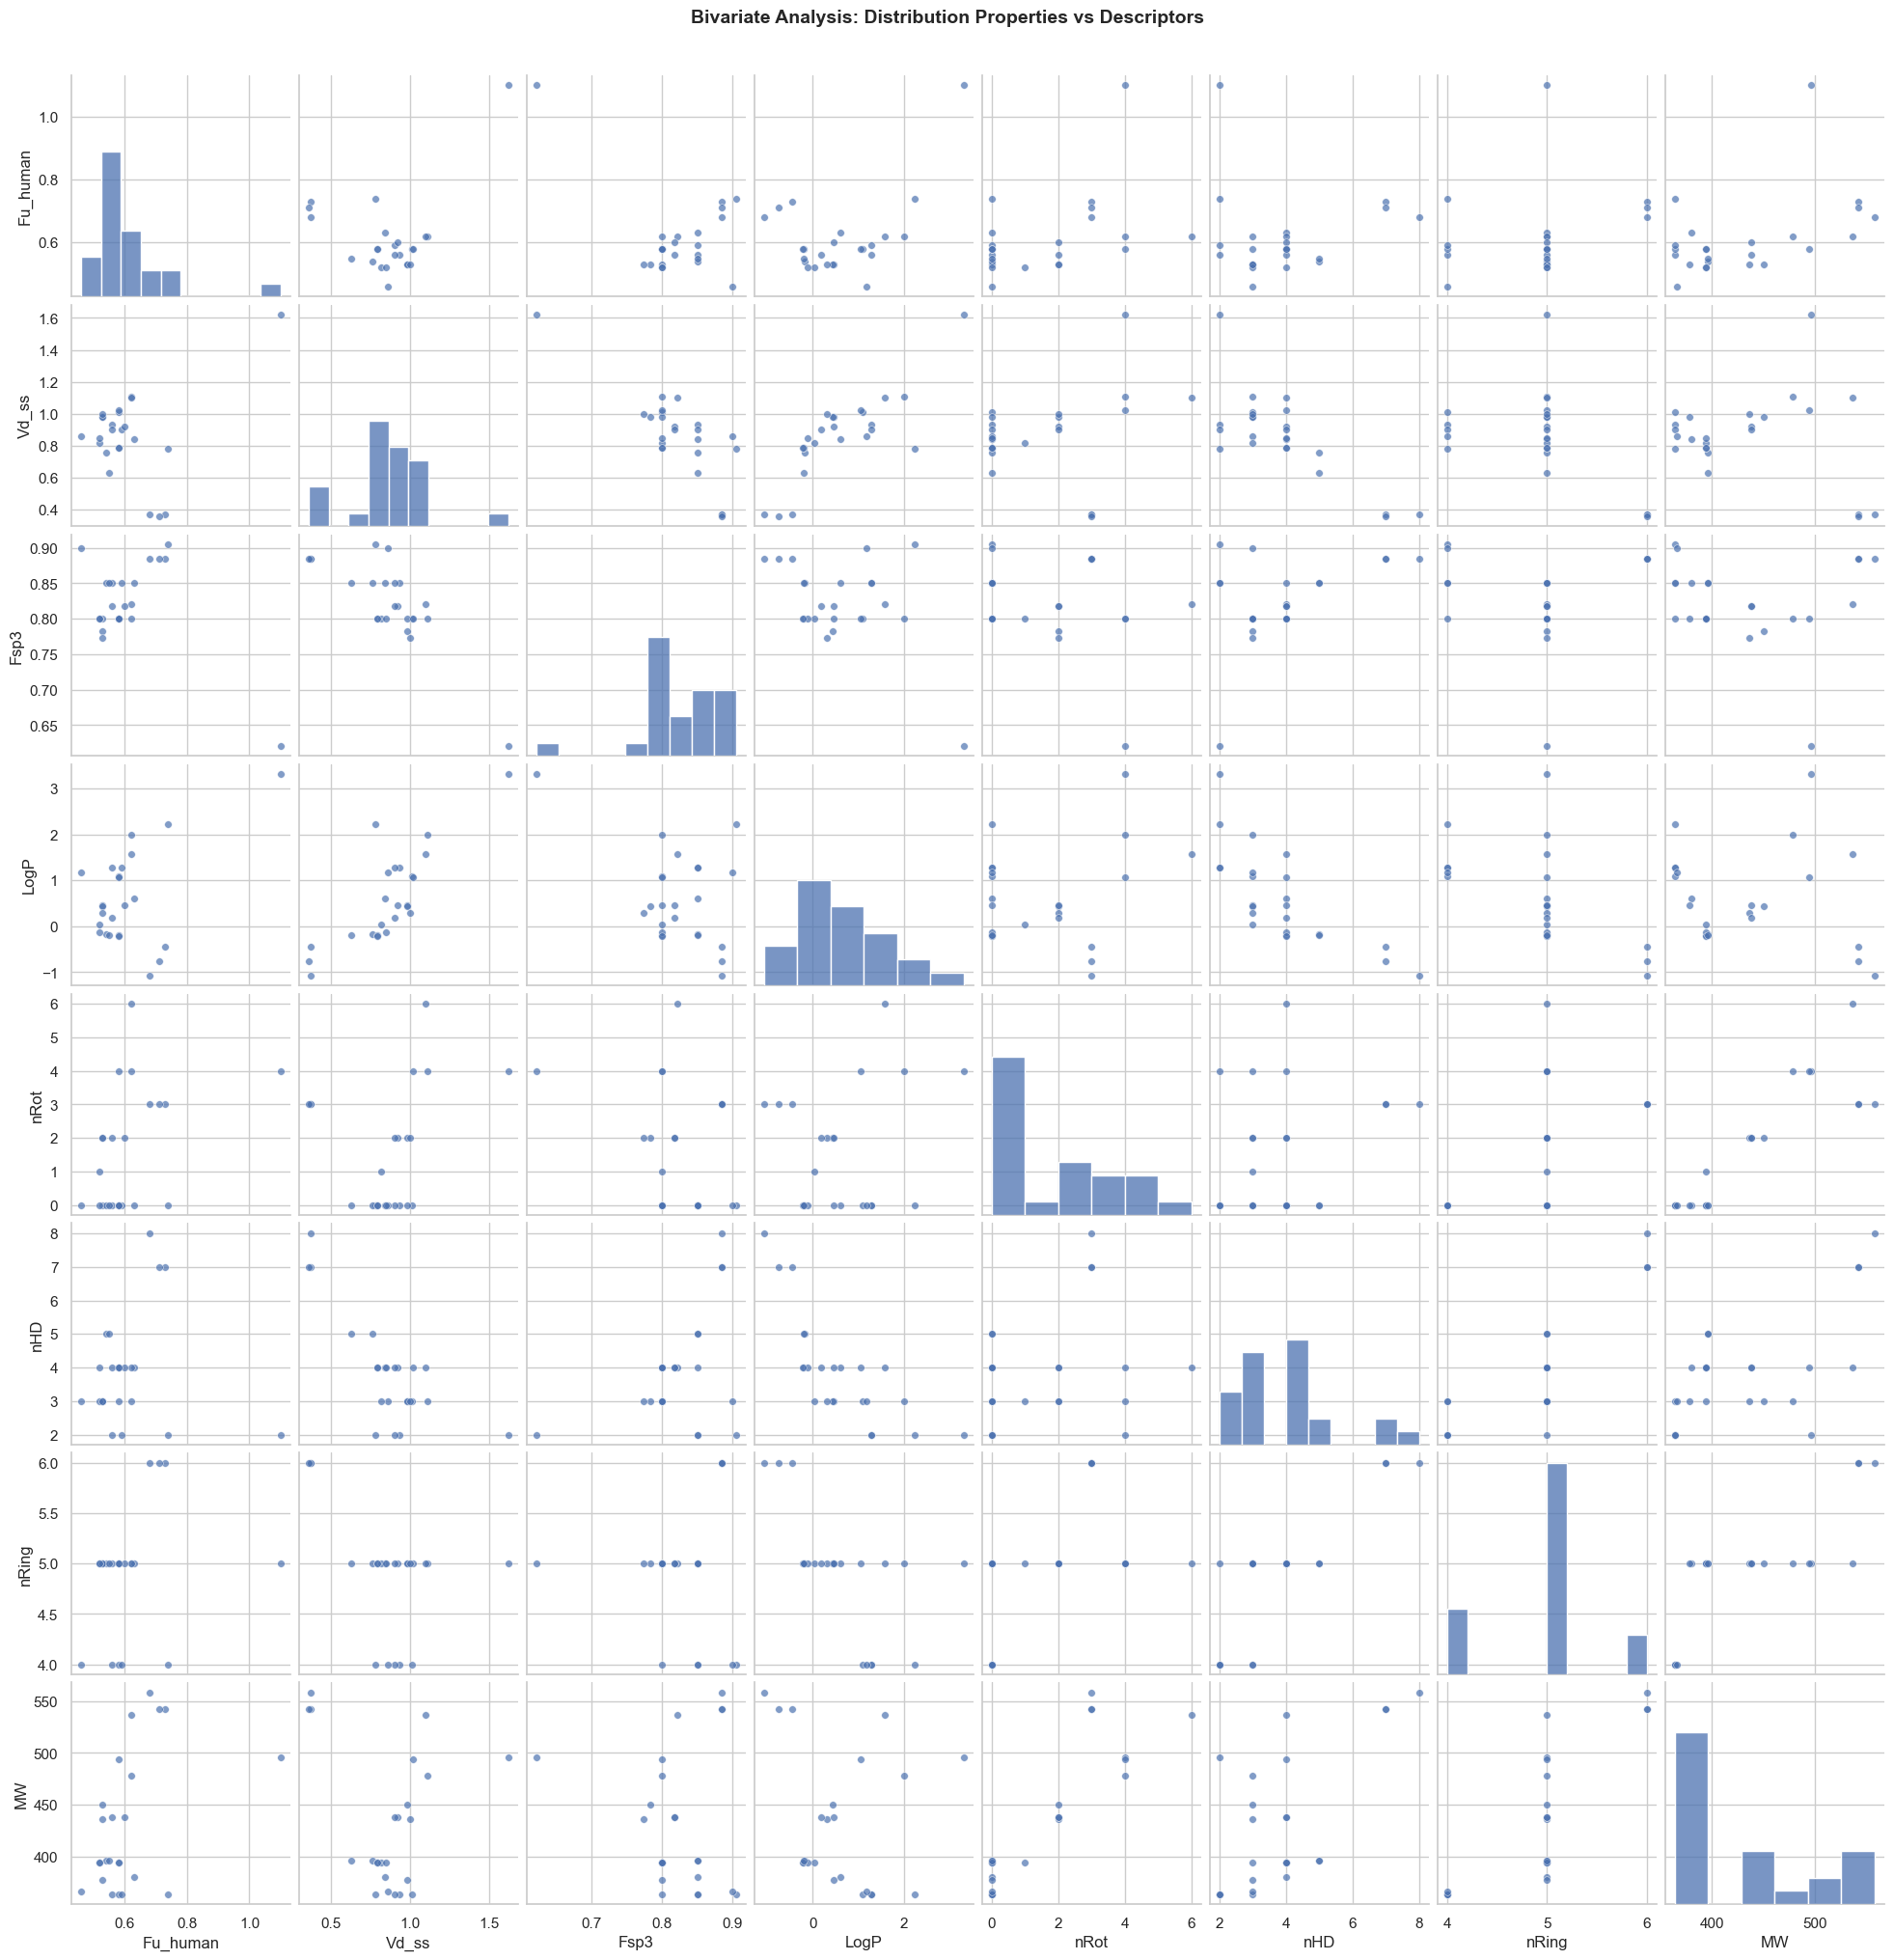

Distribution analysis completed successfully.


In [18]:
# =========================================================
# Imports
# =========================================================
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# =========================================================
# Configuration
# =========================================================
INPUT_FILE = "cuasinoides.xlsx"
SHEET_NAME = "pkcsm"
OUTPUT_DIR = "2.Distribution"
os.makedirs(OUTPUT_DIR, exist_ok=True)

MAX_PAIRPLOT_VARS = 8
MAX_PAIRPLOT_ROWS = 2000

# =========================================================
# Read data
# =========================================================
df = pd.read_excel(INPUT_FILE, sheet_name=SHEET_NAME)

# =========================================================
# Rename ORIGINAL pkCSM column names
# =========================================================
RENAME_MAP = {
    "[General Properties/Log(P)] Predictions": "LogP",
    "[Distribution/Fraction Unbound (Human)] Predictions": "Fu_human",
    "[Distribution/Steady State Volume of Distribution] Predictions": "Vd_ss"
}

# Only rename columns that actually exist
df = df.rename(columns={k: v for k, v in RENAME_MAP.items() if k in df.columns})

# =========================================================
# Define variables
# =========================================================
descriptor_cols = [
    "MW", "LogP", "TPSA", "Fsp3",
    "nHA", "nHD", "nRot", "nRing", "nHet"
]

distribution_cols = ["Fu_human", "Vd_ss"]

# =========================================================
# Subset dataframe safely
# =========================================================
cols_keep = [c for c in descriptor_cols + distribution_cols if c in df.columns]
df = df[cols_keep].copy()

# =========================================================
# Convert to numeric
# =========================================================
df = df.apply(pd.to_numeric, errors="coerce")

# Remove rows with no useful data
df = df.dropna(how="all")

# =========================================================
# Sanity check
# =========================================================
missing = [c for c in distribution_cols if c not in df.columns]
if missing:
    raise ValueError(f"Missing required distribution columns: {missing}")

# =========================================================
# Spearman correlation + p-values
# =========================================================
def spearman_corr_pval(df_in):
    cols = df_in.columns
    corr = pd.DataFrame(np.nan, index=cols, columns=cols)
    pval = pd.DataFrame(np.nan, index=cols, columns=cols)

    for a in cols:
        for b in cols:
            mask = df_in[a].notna() & df_in[b].notna()
            if mask.sum() >= 3:
                r, p = spearmanr(df_in.loc[mask, a], df_in.loc[mask, b])
                corr.loc[a, b] = r
                pval.loc[a, b] = p
    return corr, pval

corr_df, pval_df = spearman_corr_pval(df)

# =========================================================
# Prepare heatmap annotations (STRING dtype → no warnings)
# =========================================================
def significance_stars(p):
    if pd.isna(p):
        return ""
    if p <= 0.001:
        return "***"
    if p <= 0.01:
        return "**"
    if p <= 0.05:
        return "*"
    return ""

annot = pd.DataFrame("", index=corr_df.index, columns=corr_df.columns)

for i in corr_df.index:
    for j in corr_df.columns:
        if not pd.isna(corr_df.loc[i, j]):
            annot.loc[i, j] = f"{corr_df.loc[i, j]:.2f}{significance_stars(pval_df.loc[i, j])}"

# =========================================================
# Plot: Spearman correlation heatmap
# =========================================================
sns.set_theme(style="whitegrid", context="notebook")
mask = np.triu(np.ones_like(corr_df, dtype=bool))

fig, ax = plt.subplots(
    figsize=(max(7, 0.6 * len(corr_df)),
             max(5, 0.5 * len(corr_df)))
)

sns.heatmap(
    corr_df,
    mask=mask,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    center=0,
    annot=annot,
    fmt="",
    annot_kws={"size": 8},
    linewidths=0.3,
    cbar_kws={"shrink": 0.6},
    vmin=-1,
    vmax=1,
    ax=ax
)

ax.set_title(
    "Spearman Correlation Matrix\n"
    "(Fu = fraction unbound, Vd = steady-state volume of distribution)",
    fontsize=12,
    fontweight="bold"
)

plt.tight_layout()
plt.savefig(
    os.path.join(OUTPUT_DIR, "spearman_distribution_heatmap.png"),
    dpi=300,
    bbox_inches="tight"
)
plt.show()

# =========================================================
# Select variables for pairplot
# =========================================================
vars_for_pairplot = distribution_cols.copy()
remaining = MAX_PAIRPLOT_VARS - len(vars_for_pairplot)

if remaining > 0:
    avg_abs_corr = (
        corr_df.loc[descriptor_cols, distribution_cols]
        .abs()
        .mean(axis=1)
        .sort_values(ascending=False)
    )
    vars_for_pairplot += avg_abs_corr.head(remaining).index.tolist()

pairplot_df = df[vars_for_pairplot].dropna(how="all")

if len(pairplot_df) > MAX_PAIRPLOT_ROWS:
    pairplot_df = pairplot_df.sample(MAX_PAIRPLOT_ROWS, random_state=42)

# =========================================================
# Pairplot
# =========================================================
pp = sns.pairplot(
    pairplot_df,
    diag_kind="hist",
    plot_kws={"s": 30, "alpha": 0.7}
)

pp.fig.suptitle(
    "Bivariate Analysis: Distribution Properties vs Descriptors",
    fontsize=14,
    fontweight="bold",
    y=1.02
)

pp.fig.savefig(
    os.path.join(OUTPUT_DIR, "pairplot_distribution.png"),
    dpi=300,
    bbox_inches="tight"
)

plt.show()

# =========================================================
# Save numeric outputs
# =========================================================
corr_df.to_csv(os.path.join(OUTPUT_DIR, "spearman_corr.csv"))
pval_df.to_csv(os.path.join(OUTPUT_DIR, "spearman_pvalues.csv"))
pairplot_df.to_csv(os.path.join(OUTPUT_DIR, "pairplot_data.csv"), index=False)

print("Distribution analysis completed successfully.")
